In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 50
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../Dataset/Updated_Dataset'
path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Binary/saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train_data.csv')
val_df = pd.read_csv(f'{dir}/val_data.csv')
test_df = pd.read_csv(f'{dir}/test_data.csv')

train_texts = train_df['tweet'].values
val_texts = val_df['tweet'].values
test_texts = test_df['tweet'].values

train_labels = train_df['label'].values
val_labels = val_df['label'].values
test_labels = test_df['label'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

the first batch of invitations to the power write course be go out now spring21 batch if you get an email from ben you be in 0
do not make me do the emotional labor of answer how be you 1
in politicalmedical news there be an impact stool in our body politic 0
there be no product in sf 0
dad look bianca it be the first time you dress up like an anime girl me die inside 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i])
    , train_labels[i])

first batch invitations power write course go spring21 batch get email ben 0
make emotional labor answer 1
politicalmedical news impact stool body politic 0
product sf 0
dad look bianca first time dress like anime girl die inside 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, loss=0.353]


Train loss 0.5148170597413007 accuracy 0.7373178380372625
Validation loss 0.35316238983681325 accuracy 0.8399311531841652
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8399311531841652
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 85/85 [00:39<00:00,  2.14it/s, loss=0.304]


Train loss 0.38038823218906626 accuracy 0.8361925843940232
Validation loss 0.3730950590811278 accuracy 0.8347676419965577
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 85/85 [00:39<00:00,  2.15it/s, loss=0.285]


Train loss 0.32571547995595374 accuracy 0.8629404168972513
Validation loss 0.40140163114196376 accuracy 0.8502581755593804
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8502581755593804
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 85/85 [00:39<00:00,  2.16it/s, loss=0.179]


Train loss 0.28188675010905545 accuracy 0.8788046485888212
Validation loss 0.30959661775513697 accuracy 0.8691910499139415
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8691910499139415
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 85/85 [00:39<00:00,  2.15it/s, loss=0.101]


Train loss 0.25149917856735343 accuracy 0.9002029145914038
Validation loss 0.31106100427476985 accuracy 0.8889845094664373
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.8889845094664373
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.19it/s, loss=0.0889]


Train loss 0.2268671320641742 accuracy 0.9097952407304924
Validation loss 0.3320885324164441 accuracy 0.8864027538726335
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.18it/s, loss=0.0765]


Train loss 0.19588355842758629 accuracy 0.9227079874561889
Validation loss 0.3979050454340483 accuracy 0.878657487091222
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.19it/s, loss=0.0347]


Train loss 0.15162580648765844 accuracy 0.9415237041136321
Validation loss 0.36511541981446116 accuracy 0.8846815834767642
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 85/85 [00:39<00:00,  2.16it/s, loss=0.0559]


Train loss 0.13023217118838254 accuracy 0.9481645452868473
Validation loss 0.4640281357263264 accuracy 0.8545611015490534
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.22it/s, loss=0.0254]


Train loss 0.1258652908837094 accuracy 0.951484965873455
Validation loss 0.4091895246192029 accuracy 0.8864027538726335
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


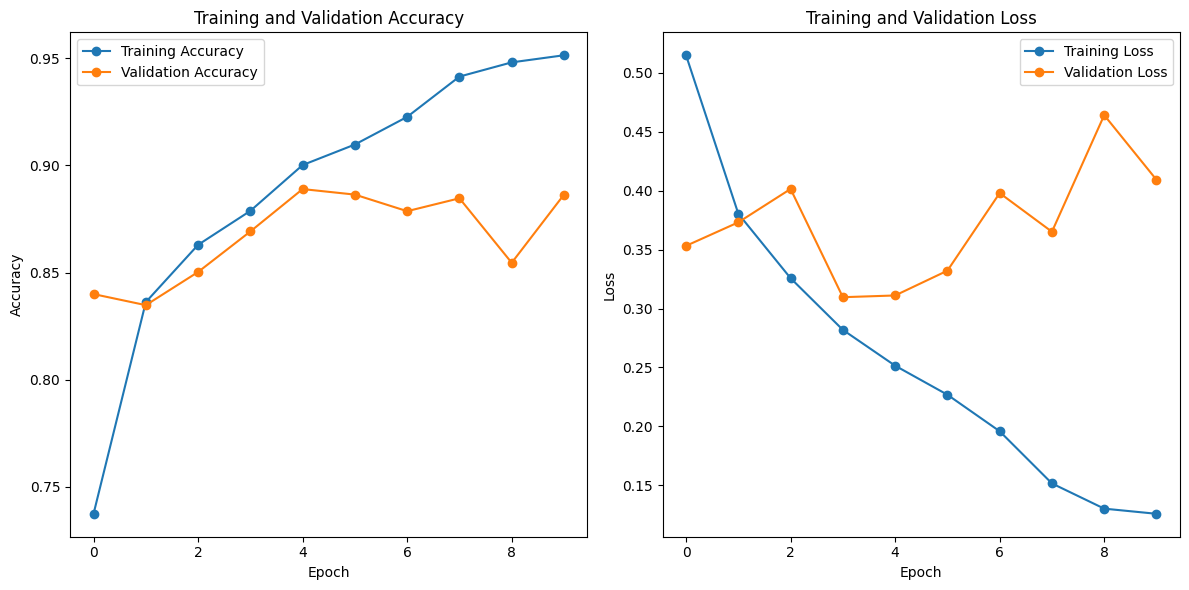

In [9]:
hlp.plot_history(history)

In [11]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Binary/saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [12]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9010327022375215 Test Loss: 0.2957322332811983


Accuracy: 0.9
F1 Score: 0.9
Precision: 0.9
Recall: 0.9

Classification Report:
                precision    recall  f1-score   support

Non-Depression       0.93      0.90      0.92       724
    Depression       0.85      0.89      0.87       438

      accuracy                           0.90      1162
     macro avg       0.89      0.90      0.90      1162
  weighted avg       0.90      0.90      0.90      1162



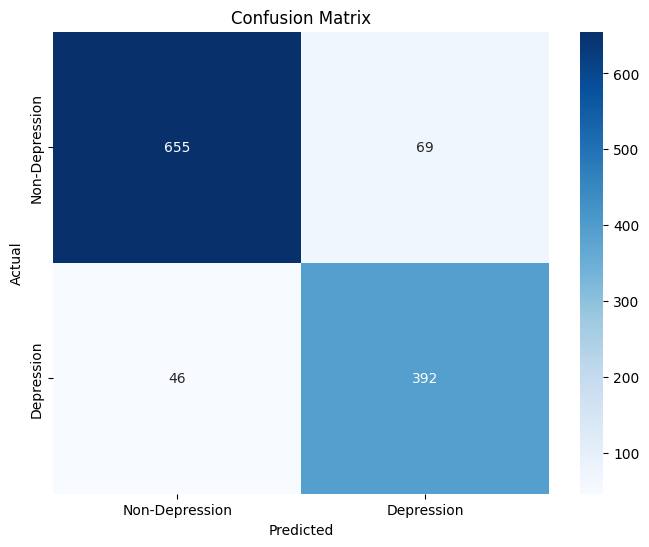

In [13]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Depression', 'Depression'])

In [ ]:
test_texts = [
    "I feel so low and empty, life doesn't seem to have any purpose anymore.",
    "Had a great day at the park with friends, feeling really positive!"
]

preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

for i, text in enumerate(test_texts):
    if preds[i] == 1:
        print(f"Text: {text}\nPredicted class: Depression \nConfidence: {confidence[i][1]:.2f}\n")
    else:
        print(f"Text: {text}\nPredicted class: Normal \nConfidence: {confidence[i][0]:.2f}\n")

Text: I feel so low and empty, life doesn’t seem to have any purpose anymore.
Predicted class: Depression 
Confidence: 0.97

Text: Had a great day at the park with friends, feeling really positive!
Predicted class: Normal 
Confidence: 0.85

